In [ ]:
import urllib.request
urllib.request.urlcleanup()

TODO Einführung in Colab (analog zu dem Teil von Muriel für den eXXcellent workshop)

# Pandas Einführung

Pandas ist *die* Standard-Python-Bibliothek für die grundlegende Verarbeitung und Analyse von Daten.

In diesem Notebook werden die wichtigsten Pandas-Konzepte und -Funktionen vorgestellt. Die Hauptquelle für diese Einführung ist die offizielle Pandas-Webseite, die auch weiterführende Informationen enthält:

https://pandas.pydata.org/pandas-docs/stable/user_guide/

In jeder Sektion ist der entsprechende Teil der Dokumentation verlinkt.


In [ ]:
# Die Module Pandas und Numpy (bietet unterstützende, numerische Funktionen) laden
import pandas as pd
import numpy as np

## Einfache Datenstrukturen in Python

Zunächst ein paar Basics mit Python. Eine einfache Liste wird in Python mit eckigen Klammern angelegt.

In [ ]:
some_ua_characters = ['Vanya', 'Luther', 'Diego', 'Allison', 'Klaus', 'Five']
some_primes = [1, 2, 3, 5, 7, 11, 13]

Auf die einzelnen Elemente einer Liste wird mit dem Index-Operator `[]` unter Angabe der Position des Elements zugegriffen.

In [ ]:
some_ua_characters[0]

'Vanya'

Die Länge einer Liste wird mit der Funktion `len` zurückgegeben.

In [ ]:
len(some_primes)

7

Eine Zuordnungstabelle mit Paaren aus Schlüssel und Wert (in Python Dictionary genannt) wird mit geschweiften Klammern angelegt.

In [ ]:
hans = {'first name': 'Hans', 'last name': 'Mustermann', 'age': 42, 'city': 'Bielefeld'}
hans

{'age': 42,
 'city': 'Bielefeld',
 'first name': 'Hans',
 'last name': 'Mustermann'}

Auch hier kannst Du mit dem Index-Operator auf die Werte der einzelnen Elemente zugreifen; aber unter Angabe des Schlüssels statt der Position.

In [ ]:
hans_alter = hans['age']
hans_vorname = hans['first name']
print("%s ist %s Jahre alt." % (hans_vorname, hans_alter))

Hans ist 42 Jahre alt.


Welchen Datentyp eine Variable hat, kannst Du mit der Funktion ``type`` bestimmen.



In [ ]:
print(type(some_primes))
print(type(hans))
print(type('Hans'))
print(type(1.5834645))

<class 'list'>
<class 'dict'>
<class 'str'>
<class 'float'>


## DataFrames und Series

Der wichtigste Datentyp in Pandas ist der DataFrame. Ein DataFrame ist eine Tabelle mit Zeilen und Spalten.

In den meisten Fällen wirst Du einen DataFrame aus einer Datei einlesen oder von einer Datenbank abfragen.

Ein DataFrame kann aber auch zu Fuß z.B. auf Basis von Spalten mit einem Dictionary erzeugt werden. Im Dictionary ist der Schlüssel der Spaltenname und der Wert sind die Spalteneinträge als Liste.

In [ ]:
df = pd.DataFrame({'character': ['Vanya', 'Luther', 'Diego', 'Allison', 'Klaus', 'Five'],
                   'actor': ['Ellen Page', 'Tom Hopper', 'David Castañeda', 'Emmy Raver-Lampman', 'Robert Sheehan', 'Aidan Gallagher'],
                   'year_of_birth': [1987, 1985, 1989, 1988, 1988, 2003]})
df

,character,actor,year_of_birth
0,Vanya,Ellen Page,1987
1,Luther,Tom Hopper,1985
2,Diego,David Castañeda,1989
3,Allison,Emmy Raver-Lampman,1988
4,Klaus,Robert Sheehan,1988
5,Five,Aidan Gallagher,2003


Oder du übergibst die Daten auf Basis von Zeilen (als Liste von Listen) und die Spaltennamen als ein zusätzliches Attribut.

In [ ]:
df = pd.DataFrame([['Vanya', 'Ellen Page', 1987],
                   ['Luther', 'Tom Hopper', 1985],
                   ['Diego', 'David Castañeda', 1989],
                   ['Allison', 'Emmy Raver-Lampman', 1988],
                   ['Klaus', 'Robert Sheehan', 1988],
                   ['Five', 'Aidan Gallagher', 2003]], columns=['character', 'actor', 'year_of_birth'])
df

,character,actor,year_of_birth
0,Vanya,Ellen Page,1987
1,Luther,Tom Hopper,1985
2,Diego,David Castañeda,1989
3,Allison,Emmy Raver-Lampman,1988
4,Klaus,Robert Sheehan,1988
5,Five,Aidan Gallagher,2003


Für die Anzahl der Zeilen eines DataFrame gibt es überraschenderweise kein spezielles Attribut. Das Attribut `shape`, das sowohl die Anzahl der Zeilen als auch die Anzahl der Spalten als Tupel liefert, kannst Du alternativ nutzen.

In [ ]:
df.shape

(6, 3)

In [ ]:
# Anzahl der Zeilen steht im ersten Element der Liste (Position=0)
df.shape[0]

6

Die Spaltennamen eines DataFrame stecken im Attribut `columns`, die Datentypen der Spalten im Attribut `dtypes`. 

In [ ]:
df.columns

Index(['character', 'actor', 'year_of_birth'], dtype='object')

In [ ]:
df.dtypes

character        object
actor            object
year_of_birth     int64
dtype: object

Um einen ersten Eindruck von den Daten zu gewinnen, ist es oft hilfreich, sich die ersten paar Zeilen eines DataFrames auszugeben, was mit `head` geht. Ein paar statistische Informationen über einen DataFrame gibt die Funktion `describe` aus.

In [ ]:
df.head()

,character,actor,year_of_birth
0,Vanya,Ellen Page,1987
1,Luther,Tom Hopper,1985
2,Diego,David Castañeda,1989
3,Allison,Emmy Raver-Lampman,1988
4,Klaus,Robert Sheehan,1988


In [ ]:
df.describe(include='all')

,character,actor,year_of_birth
count,6,6,6.000000
unique,6,6,NaN
top,Klaus,Robert Sheehan,NaN
freq,1,1,NaN
mean,NaN,NaN,1990.000000
std,NaN,NaN,6.511528
min,NaN,NaN,1985.000000
25%,NaN,NaN,1987.250000
50%,NaN,NaN,1988.000000
75%,NaN,NaN,1988.750000


Um von einem DataFrame eine einzelne Spalte zu erhalten, wird der Index-Operator mit Angabe des Spaltennamens benutzt.

In [ ]:
df['actor']

0            Ellen Page
1            Tom Hopper
2       David Castañeda
3    Emmy Raver-Lampman
4        Robert Sheehan
5       Aidan Gallagher
Name: actor, dtype: object

Eine Spalte wird vom DataFrame nicht als einfache Liste zurückgeben, sondern als Objekt der Klasse *Series*, die viele nützliche Attribute und Funktionen bereitstellt, z.B. die Anzahl der Werte (`size`), Mittelwert (`mean`), kleinster Wert (`min`), größter Wert (`max`), die unterschiedlichen Werte (`unique`) oder deren Anzahl (`nunique`).

In [ ]:
type(df['actor'])

pandas.core.series.Series

In [ ]:
print('Anzahl der Schauspieler: %s' % df['actor'].size)
print('Anzahl unterschiedlicher Werte für Geburtsjahr: %s' % df['year_of_birth'].nunique())
print('Durchschnittsalter der Schauspieler: %s' % (2020-df['year_of_birth'].mean()))
print('Alter des jüngsten Mitglieds: %s' % (2020-df['year_of_birth'].max()))
print('Alter des ältesten Mitglieds: %s' % (2020-df['year_of_birth'].min()))

Anzahl der Schauspieler: 6
Anzahl unterschiedlicher Werte für Geburtsjahr: 5
Durchschnittsalter der Schauspieler: 30.0
Alter des jüngsten Mitglieds: 17
Alter des ältesten Mitglieds: 35


*   Einführung in Pandas-Datenstrukturen: https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro
*   Dokumentation der Klasse DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
*   Dokumentation der Klasse Series: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

### DataFrames aus Dateien lesen

Pandas beinhaltet umfangreiche Methoden zum lesen und schreiben für verbreitete Formate, z.B. CSV, JSON, HTML, Excel oder auch das klassische "fixed width format".

Eine CSV-Datei wird mit der Funktion `read_csv` eingelesen.

Hier ein Beispiel, das von Pandas direkt ziemlich gut eingelesen wird:

```
product,price,valid_from,valid_to,in_print_brochure
Rote Äpfel,2.9,2020-11-09;2020-11-15,TRUE
Mini Käsekuchen,1.93,2020-11-17,2020-11-23,FALSE
```

In [ ]:
pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/Offers.csv')

,product,price,valid_from,valid_to,in_print_brochure
0,Rote Äpfel,2.90,2020-11-09,2020-11-15,True
1,Mini Käsekuchen,1.93,2020-11-17,2020-11-23,False


Das klappt aber nicht immer. Hier eine zweite Beispiel-Datei, die Pandas ohne Hinweise nicht gut einliest, weil Spaltenüberschriften fehlen, das Trennzeichen ein Semikolon ist, ...

```
Rote Äpfel;2,9;09.11.2020;15.11.2020;Wahr
Mini Käsekuchen;1,93;17.11.2020;23.11.2020;Falsch
```


In [ ]:
pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/Angebote.csv')

,Rote Äpfel;2,9;09.11.2020;15.11.2020;Wahr
0,Mini Käsekuchen;1,93;17.11.2020;23.11.2020;Falsch


Für solche Fälle gibt es eine Unmenge an Optionen, damit Du die CSV-Dateien in den unterschiedlichsten Geschmackrichtungen einlesen kannst. Eine kleine Auswahl:

* `sep` Spalten-Trennzeichen (Default `sep=','`)
* `names` Spalten-Namen, falls die Datei keine enthält 
* `true_values`/`false_values` Liste mit Strings für Boolsche-Werte
* `decimal` Dezimaltrennzeichen (Default `.`)
* `thousands` Tausendertrennzeichen
* `parse_dates` Liste der Spalten, die als Datum/Zeit interpretiert werden sollen
* `date_parser` Funktion, die für das Parsen von Datum/Zeit-Spalten genutzt werden soll (falls der Default-Parser nicht funktioniert)

Und dann klappt das auch...

In [ ]:
pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/Angebote.csv',
            sep=';', names=['product', 'price', 'valid_from', 'valid_to', 'in_print_brochure'],
            decimal=',',
            true_values=['Wahr'], false_values=['Falsch'],
            parse_dates=['valid_from', 'valid_to'],
            date_parser=lambda x: pd.to_datetime(x, format='%d.%m.%Y')) # Lambdafunktion für die Datumskonvertierung

,product,price,valid_from,valid_to,in_print_brochure
0,Rote Äpfel,2.90,2020-11-09,2020-11-15,True
1,Mini Käsekuchen,1.93,2020-11-17,2020-11-23,False


Weiterführende Dokumentation zum Thema IO gibt es noch hier: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

### Übung
Für die Übungen in diesem Notebook kannst Du entweder Deine eigenen Datensätze verwenden oder Du nutzt Daten aus der [Akeed Restaurant Recommendation Challenge](https://zindi.africa/competitions/akeed-restaurant-recommendation-challenge/data), die wir für Dich vorbereitet haben.

Akeed ist ein Essenslieferdienst aus Oman - ähnlich wie Lieferando, Foodora & Co.

Als Daten stehen bereit:

* Lieferant, von denen Essen bezogen werden kann (https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/vendors.csv.xz)
* Kunden, die Essen bestellt haben (https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/customers.csv.xz)
* Lieferorte, an die das Essen ausgeliefert wird (https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/locations.csv.xz)
* Bestellungen, die von Kunden getätigt wurden (https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/orders.csv.xz)

Jetzt zu den Aufgaben für Dich:

1.   Lese die Daten jeweils in einen eigenen DataFrame ein.
2.   Mache dich mit den Daten vertraut. Lasse Dir für jeden Datensatz die ersten Zeilen ausgeben. Welche Datentypen sind in den Spalten? Wie viele Zeilen haben die Datensätze?
3.   Wann wurde die erste (älteste) Bestellung ausgeliefert?
4.   Wann wurde die letzte (neueste) Bestellung ausgeliefert?
5.   Was ist die durchschnittliche Bewertung der Lieferanten auf Basis der Bestellungen (orders.csv.xz)?
6.   Was ist die durchschnittliche Bewertung der Lieferanten auf Basis der Stammdaten (vendors.csv.xz)?

Zwei zusätzliche Tipps:
* Pandas wird die komprimierten Daten automatisch entpacken.
* Achte darauf, dass Du die Datum/Zeit-Spalten auch als solche importierst.

In [ ]:
# Platz für Deine Übungen :)

### Lösungen

In [ ]:
# 1. Lese die Daten jeweils in einen eigenen DataFrame ein.
vendors = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/vendors.csv.xz')
customers = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/customers.csv.xz')
locations = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/locations.csv.xz')
orders = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/orders.csv.xz',
                     parse_dates=['order_accepted_time', 'delivered_time', 'delivery_date'])

In [ ]:
# 2. Mache dich mit den Daten vertraut. Lasse Dir für jeden Datensatz die ersten Zeilen ausgeben.
orders.head()

,customer_id,grand_total,vendor_rating,driver_rating,delivery_distance,order_accepted_time,delivered_time,delivery_date,vendor_id,location_number
0,92PEE24,7.6,NaN,0.0,0.0,NaT,NaT,2019-07-31,105,0
1,QS68UD8,8.7,NaN,0.0,0.0,NaT,NaT,2019-07-31,294,0
2,MB7VY5F,14.4,NaN,0.0,0.0,NaT,NaT,2019-07-31,83,0
3,KDJ951Y,7.1,NaN,0.0,0.0,NaT,NaT,2019-07-31,90,0
4,BAL0RVT,27.2,NaN,0.0,0.0,NaT,NaT,2019-07-31,83,0


In [ ]:
# 2. Mache dich mit den Daten vertraut. Welche Datentypen sind in den Spalten?
orders.dtypes

customer_id                    object
grand_total                   float64
vendor_rating                 float64
driver_rating                 float64
delivery_distance             float64
order_accepted_time    datetime64[ns]
delivered_time         datetime64[ns]
delivery_date          datetime64[ns]
vendor_id                       int64
location_number                 int64
dtype: object

In [ ]:
# 2. Mache dich mit den Daten vertraut. Wie viele Zeilen haben die Datensätze?
orders.shape[0]

135303

In [ ]:
# 3. Wann wurde die erste (älteste) Bestellung ausgeliefert?
orders['delivered_time'].min()

Timestamp('2019-10-02 10:45:35')

In [ ]:
# 4. Wann wurde die letzte (neueste) Bestellung ausgeliefert?
orders['delivered_time'].max()

Timestamp('2020-04-01 16:54:26')

In [ ]:
# 5. Was ist die durchschnittliche Bewertung der Lieferanten auf Basis der Bestellungen (orders.csv.xz)?
orders['vendor_rating'].mean()

1.9597302078726226

In [ ]:
# 6. Was ist die durchschnittliche Bewertung der Lieferanten auf Basis der Stammdaten (vendors.csv.xz)?
vendors['vendor_rating'].mean()

4.35

## Daten filtern



Als einfachen Beispieldatensatz verwenden wir im Folgenden das verbreitete **Iris flower data set**. Es enthält 150 Einträge von verschiedenen Blumen der Gattung "Schwertlilie" mit Angaben über die Größe (in cm) ihrer Blütenblätter (`petal_length`, `petal_width`), Kelchblätter (`sepal_length`, `sepal_width`) und die Pflanzenart (`species`) mit den Ausprägungen [Borsten-Schwertlilie](https://de.wikipedia.org/wiki/Borsten-Schwertlilie) (`setosa`), [verschiedenfarbige Schwertlilie](https://de.wikipedia.org/wiki/Verschiedenfarbige_Schwertlilie) (`versicolor`) und [virginische Schwertlilie](https://en.wikipedia.org/wiki/Iris_virginica) (`virginica`).

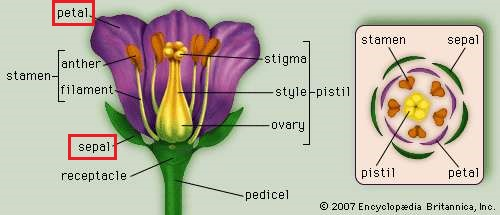

In [ ]:
iris = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,species-setosa
1,4.9,3.0,1.4,0.2,species-setosa
2,4.7,3.2,1.3,0.2,species-setosa
3,4.6,3.1,1.5,0.2,species-setosa
4,5.0,3.6,1.4,0.2,species-setosa


Um einen DataFrame nach Kriterien zu filtern, kannst Du die Property `loc` nutzen. Zum Beispiel um alle Pflanzen anzuzeigen, deren Kelchblätter 4,6 cm lang sind.

In [ ]:
iris.loc[iris['sepal_length']==4.6]

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,species-setosa
6,4.6,3.4,1.4,0.3,species-setosa
22,4.6,3.6,1.0,0.2,species-setosa
47,4.6,3.2,1.4,0.2,species-setosa


Nach dem `loc` kommen eckige Klammern, weil `loc` eine Property ist und keine Methode. An `loc` übergibst Du eine Boolsche-Maske, um die passenden Zeilen auszuwählen. Im obigen Beispiel eine Maske, die für alle Pflanzen, deren Kelchblätter 4,6 cm lang sind, wahr ist und für alle anderen falsch.

Du kannst für die Maske auch mehrere Ausdrücke kombinieren. Pass aber auf, dass Du die einzelnen Teilausdrücke mit Klammern versiehst, damit keine komischen Fehlermeldungen kommen. Die wichtigsten Operatoren sind `&` (und), `|` (oder) und `~` (nicht). 

In [ ]:
iris.loc[(iris['sepal_length']==4.6) | (iris['petal_length']==1.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,species-setosa
6,4.6,3.4,1.4,0.3,species-setosa
14,5.8,4.0,1.2,0.2,species-setosa
22,4.6,3.6,1.0,0.2,species-setosa
35,5.0,3.2,1.2,0.2,species-setosa
47,4.6,3.2,1.4,0.2,species-setosa


In [ ]:
iris.loc[(iris['sepal_length']>6) & (iris['petal_length']==4.9) & ~(iris['species']=='versicolor')]

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,species-versicolor
72,6.3,2.5,4.9,1.5,species-versicolor
123,6.3,2.7,4.9,1.8,species-virginica
127,6.1,3.0,4.9,1.8,species-virginica


Du kannst mit der Property `loc` neben der Zeilenfilterung auch die zurückgeliefertn Spalten filtern. Das funktioniert z.B. mit einer Liste von Spaltennamen:

In [ ]:
iris.loc[(iris['sepal_length']>7.2) & (iris['sepal_length']!=7.7), ['sepal_length', 'species']]

,sepal_length,species
105,7.6,species-virginica
107,7.3,species-virginica
130,7.4,species-virginica
131,7.9,species-virginica


Wenn Du alle Einträge mit Werten aus einer Liste möchtest, kannst Du anstatt einer Menge von oder-verknüpften Ausdrücken `isin` verwenden.

In [ ]:
iris.loc[iris['petal_width'].isin([1.2, 1.1])]

,sepal_length,sepal_width,petal_length,petal_width,species
69,5.6,2.5,3.9,1.1,species-versicolor
73,6.1,2.8,4.7,1.2,species-versicolor
80,5.5,2.4,3.8,1.1,species-versicolor
82,5.8,2.7,3.9,1.2,species-versicolor
90,5.5,2.6,4.4,1.2,species-versicolor
92,5.8,2.6,4.0,1.2,species-versicolor
95,5.7,3.0,4.2,1.2,species-versicolor
98,5.1,2.5,3.0,1.1,species-versicolor


Pandas hat auch Methoden, um nach Strings filtern zu können. Eine Auswahl:
*   `str.startswith`/`str.endswith` prüft, ob der String mit einem anderen String beginnt oder endet
*   `str.contains` prüft, ob der String einen anderen String beinhaltet
*   `str.match` prüft, ob der String zu einem regulären Ausdruck passt

In [ ]:
iris.loc[iris['species'].str.endswith('a')]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,species-setosa
1,4.9,3.0,1.4,0.2,species-setosa
2,4.7,3.2,1.3,0.2,species-setosa
3,4.6,3.1,1.5,0.2,species-setosa
4,5.0,3.6,1.4,0.2,species-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,species-virginica
146,6.3,2.5,5.0,1.9,species-virginica
147,6.5,3.0,5.2,2.0,species-virginica
148,6.2,3.4,5.4,2.3,species-virginica


In [ ]:
# Platz für Deine Übungen :)

### Übung

Jetzt zu den Aufgaben für Dich:

1.   Wie viele Bestellungen haben mehr als 200 Rials gekostet?
2.   Was ist die durchschnittliche Bewertung der Lieferanten der Kategorie "Sweets & Bakes"?
3.   Gebe die Lieferanten-Datensätze der Kategorie "Sweets & Bakes" aus, die einen Umkreis von weniger als 15km beliefern.
4.   Wie viele Kunden haben schon einmal bei einer Bestellung den Lieferanten höher als den Fahrer bewertet?
5.   Gebe die Lieferanten-Datensätze aus, die "Pizza" und "Pasta" aber kein "Italian" im Angebot haben. *Tipp: Nutze den Parameter `na=False` der Methode `str.contains`.*

### Lösungen

In [ ]:
# 1. Wie viele Bestellungen haben mehr als 200 Rials gekostet?
orders[orders['grand_total']>200].shape[0]

7

In [ ]:
# 2. Was ist die durchschnittliche Bewertung der Lieferanten der Kategorie "Sweets & Bakes"
vendors.loc[vendors['vendor_category_en']=='Sweets & Bakes', 'vendor_rating'].mean()

4.366666666666666

In [ ]:
# 3. Gebe die Lieferanten-Datensätze der Kategorie "Sweets & Bakes" aus, die einen Umkreis von weniger als 15km beliefern.
vendors.loc[(vendors['serving_distance']<15) & (vendors['vendor_category_en']=='Sweets & Bakes')]

,vendor_id,latitude,longitude,vendor_category_en,serving_distance,opening_time,vendor_rating,vendor_tag_name
19,85,-0.600173,0.755861,Sweets & Bakes,5.0,11:59AM-11:30PM,4.6,"Desserts,Omani"
46,196,-1.787413,0.006934,Sweets & Bakes,10.0,06:00PM-11:59PM,4.4,NaN
55,231,205.242327,44.210807,Sweets & Bakes,10.0,9am-10pm,4.3,NaN
60,265,-0.861073,-0.065147,Sweets & Bakes,10.0,08:00AM-11:45PM,4.3,"Desserts,Free Delivery,Fresh Juices,Healthy Fo..."


In [ ]:
# 4. Gebe die Anzahl der Kunden aus, die schon einmal bei einer Bestellung den Lieferanten höher als den Fahrer bewertet haben
orders.loc[orders['vendor_rating']>orders['driver_rating'], 'customer_id'].nunique()

1481

In [ ]:
# 5. Gebe die Lieferanten-Datensätze aus, die "Pizza" und "Pasta" aber kein "Italian" im Angebot haben.
vendors.loc[vendors['vendor_tag_name'].str.contains('Pasta', na=False) &
            vendors['vendor_tag_name'].str.contains('Pizza', na=False) &
            ~vendors['vendor_tag_name'].str.contains('Italian', na=False)]

,vendor_id,latitude,longitude,vendor_category_en,serving_distance,opening_time,vendor_rating,vendor_tag_name
73,356,-0.845096,0.067013,Restaurants,15.0,11:00AM-111:00PM,4.2,"American,Kids meal,Pasta,Pizzas,Salads"


## Spalten transformieren, hinzufügen oder entfernen

### Numerische Spalten

Die Werte einer bestehenden Spalte können durch eine erneute Zuweisung ersetzt werden. Zum Beispiel kannst Du die Größe der Blätter in mm statt in cm angeben:

In [ ]:
iris_cm = iris.copy()
iris_cm['petal_width'] = iris_cm['petal_width']*10
iris_cm['petal_length'] = iris_cm['petal_length']*10
iris_cm['sepal_width'] = iris_cm['sepal_width']*10
iris_cm['sepal_length'] = iris_cm['sepal_length']*10
iris_cm.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,51.0,35.0,14.0,2.0,species-setosa
1,49.0,30.0,14.0,2.0,species-setosa
2,47.0,32.0,13.0,2.0,species-setosa
3,46.0,31.0,15.0,2.0,species-setosa
4,50.0,36.0,14.0,2.0,species-setosa


Neue Spalten können direkt über eine Zuweisung unter Angabe des neuen Spaltennamens angelegt werden. Zum Beispiel kannst Du so eine neue Spalte mit der ungefähren Fläche der Blüttenblätter hinzufügen:

In [ ]:
iris['petal_area'] = iris['petal_length']/2 * iris['petal_width']/2 * np.pi
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,species-setosa,0.219911
1,4.9,3.0,1.4,0.2,species-setosa,0.219911
2,4.7,3.2,1.3,0.2,species-setosa,0.204204
3,4.6,3.1,1.5,0.2,species-setosa,0.235619
4,5.0,3.6,1.4,0.2,species-setosa,0.219911


### Spalten umbenennen oder löschen

Spalten können auch umbenannt...

In [ ]:
iris.rename(columns={'species': 'type'}).head()

,sepal_length,sepal_width,petal_length,petal_width,type,petal_area
0,5.1,3.5,1.4,0.2,species-setosa,0.219911
1,4.9,3.0,1.4,0.2,species-setosa,0.219911
2,4.7,3.2,1.3,0.2,species-setosa,0.204204
3,4.6,3.1,1.5,0.2,species-setosa,0.235619
4,5.0,3.6,1.4,0.2,species-setosa,0.219911


... oder gelöscht werden:

In [ ]:
iris.drop(columns=['petal_area'], inplace=True) # ohne inplace=True liefert drop eine Kopie des DataFrames zurück
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,species-setosa
1,4.9,3.0,1.4,0.2,species-setosa
2,4.7,3.2,1.3,0.2,species-setosa
3,4.6,3.1,1.5,0.2,species-setosa
4,5.0,3.6,1.4,0.2,species-setosa


### Spalten mit Strings

In vielen Fällen sind in Strings Informationen "versteckt", die Du mit ein paar Transformationen herauskitzeln kannst.

Du kannst zum Beispiel einen Teilstring durch einen anderen mit `str.replace` ersetzen.


In [ ]:
iris['species'].str.replace('species-', '').head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Die Methode `str.split` zerteilt einen String auf Basis eines Trennzeichens.

In [ ]:
iris['species'].str.split('-', expand=True).head()

,0,1
0,species,setosa
1,species,setosa
2,species,setosa
3,species,setosa
4,species,setosa


Die neuen Spalten, die `str.split` liefert könntest Du in einen DataFrame unter Angabe der Spaltennamen als Liste einfügen: `df[['colname_left', 'colname_right']] = df['colname'].str.split(...)`

Wenn das Trennzeichen nicht reicht, unterstützt die Methode `str.extract` auch reguläre Ausdrücke und erzeugt für jede Gruppe eine neue Spalte.

Mehr Infos zu den Pandas-Funktionen für Strings:
*   https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [ ]:
iris['species'].str.extract(r'(spe)([a-z]+)-([a-z]+)', expand=True).head()

,0,1,2
0,spe,cies,setosa
1,spe,cies,setosa
2,spe,cies,setosa
3,spe,cies,setosa
4,spe,cies,setosa


### Spalten mit Datum und Zeit

Wenn es um Datum und Zeit geht, wird es oft ein wenig kompliziert. In Pandas gibt es deshalb eine Unmenge an Funktionalität um Datumsangaben und Zeiten zu verarbeiten. Im Folgenden eine Mini-Auswahl...

Zur Extraktion einer Komponente wie Jahr (`dt.year`), Monat (`dt.month`), Stunde (`dt.hour`) oder Name des Wochentags (`dt.day_name()`)

In [ ]:
d = pd.Series(pd.date_range('2020-02-28', periods=4, freq='d')) # Iris hat keine Spalten mit Datum/Zeit, deshalb erzeugen wir welche
d

0   2020-02-28
1   2020-02-29
2   2020-03-01
3   2020-03-02
dtype: datetime64[ns]

In [ ]:
d.dt.month

0    2
1    2
2    3
3    3
dtype: int64

Um ein Datum in die Zukunft oder Vergangenheit zu verschieben, kannst Du `pd.DateOffset`, `pandas.tseries.offsets.MonthEnd`, etc. nutzen.


In [ ]:
d + pd.DateOffset(days=1)

0   2020-02-29
1   2020-03-01
2   2020-03-02
3   2020-03-03
dtype: datetime64[ns]

In [ ]:
from pandas.tseries.offsets import MonthEnd
d + MonthEnd(0)

0   2020-02-29
1   2020-02-29
2   2020-03-31
3   2020-03-31
dtype: datetime64[ns]

Der Abstand zwischen zwei Daten kann mit dem normalen Differenz-Operator `-` berechnet werden und liefert Objekte der Klasse `Timedelta`.

In [ ]:
# Tage bis zum Monatsende berechnen
d2 = d + MonthEnd(0)
d2-d

0    1 days
1    0 days
2   30 days
3   29 days
dtype: timedelta64[ns]

Mehr Infos zu den Pandas-Funktionen für Zeitangaben:
*   https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
*   https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html

### Übung

Jetzt zu den Aufgaben für Dich:

1.   Erzeuge eine Spalte *delivered_weekday_name* für die Bestellungen mit dem Wochentag an dem die Bestellung ausgeliefert wurde.
2.   Ermittel, wie viele Bestellungen an einem Sonntag und wie viele an einem Montag ausgeliefert wurden.
3.   Ermittel, wie viel Zeit durchschnittlich zwischen der Annahme einer Bestellung (*order_accepted_time*) und der Auslieferung (*delivered_time*) verging.
4.   Extrahiere für die Lieferanten aus der Spalte *opening_time* wann der Lieferant öffnet/schließt und erzeuge dafür die zwei neuen Spalten *opens_at* und *closes_at* und lösche danach die Spalte *opening_time*.

In [ ]:
# Platz für Deine Übungen :)

### Lösungen

In [ ]:
# 1. Erzeuge eine Spalte *delivered_weekday_name* für die Bestellungen mit dem Wochentag an dem die Bestellung ausgeliefert wurde.
orders['delivered_weekday_name'] = orders['delivered_time'].dt.day_name()
orders['delivered_weekday_name'].unique()

array([nan, 'Wednesday', 'Monday', 'Saturday', 'Thursday', 'Friday',
       'Sunday', 'Tuesday'], dtype=object)

In [ ]:
# 2. Ermittel, wie viele Bestellungen an einem Sonntag und wie viele an einem Montag ausgeliefert wurden.
print('Sonntag: %d Bestellungen' % orders[orders['delivered_weekday_name']=='Sunday'].shape[0])
print('Montag: %d Bestellungen' % orders[orders['delivered_weekday_name']=='Monday'].shape[0])

Sonntag: 12106 Bestellungen
Montag: 13178 Bestellungen


In [ ]:
# 3. Ermittel, wie viel Zeit durchschnittlich zwischen der Annahme einer Bestellung (*order_accepted_time*) und der Auslieferung (*delivered_time*) verging.
(orders['delivered_time'] - orders['order_accepted_time']).mean()

Timedelta('0 days 02:20:11.284226')

In [ ]:
# 4. Extrahiere für die Lieferanten aus der Spalte *opening_time* wann der Lieferant öffnet/schließt und erzeuge dafür die zwei neuen Spalten *opens_at* und *closes_at* und lösche danach die Spalte *opening_time*.
vendors[['opens_at', 'closes_at']] = vendors['opening_time'].str.split('-', expand=True)
vendors.drop(columns=['opening_time'], inplace=True)
vendors.head()

## Daten gezielt verändern

Daten, die mit dem Operator `loc` gefiltert wurden, können auch mit neuen Werten überschrieben werden. Das ist nützlich, um Korrekturen durchzuführen oder neue Spalten in mehreren Schritten zu berechnen.

Zum Beispiel könnten wir in drei Schritten eine Spalte `sepal_length_category` erstellen, die angibt, ob die Kelchblätter kurz (Länge <80% des Mittelwerts), lang (Länge >120% des Mittelwerts) oder normal (alle anderen) sind. 

In [ ]:
iris['sepal_length_category'] = 'normal' # 1. alle auf 'normal' setzen
iris.loc[iris['sepal_length'] > iris['sepal_length'].mean()*1.2, 'sepal_length_category'] = 'long' # 2. nach den langen filtern und auf 'long' setzen
iris.loc[iris['sepal_length'] < iris['sepal_length'].mean()*0.8, 'sepal_length_category'] = 'short' # 3. nach den kurzen filtern und auf 'short' setzen
iris.loc[iris['sepal_length'].isin([4.3, 6.6, 7.9])]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_category
13,4.3,3.0,1.1,0.1,species-setosa,short
58,6.6,2.9,4.6,1.3,species-versicolor,normal
75,6.6,3.0,4.4,1.4,species-versicolor,normal
131,7.9,3.8,6.4,2.0,species-virginica,long


Es muss nicht immer nur eine Zahl oder ein String zugewiesen werden, sondern es können auch mehrere berechnet Werte sein.

In [ ]:
selection_mask = (iris['petal_width']==2) & (iris['petal_length']>6)
iris.loc[selection_mask, 'sepal_length'] = iris.loc[selection_mask, 'sepal_length'] + 0.001
iris.loc[selection_mask]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_category
122,7.701,2.8,6.7,2.0,species-virginica,long
131,7.901,3.8,6.4,2.0,species-virginica,long


### Übung

Jetzt zu den Aufgaben für Dich:

1.   In der Spalte *opens_at* der Lieferanten sind ein paar merkwürdige Werte drin. Erstelle eine Liste der eindeutigen Werte in der Spalte, um die merkwürdigen Werte "manuell" identifizieren zu können.
2.   Ersetze die merkwürdigen Einträge so, dass am Ende alle Werte ein einheitliches Format haben.
3.   Das gleich nochmal für *closes_at*, gerne auch kreativ mit anderen Mitteln als in 1. und 2. :-)

In [ ]:
# Platz für Deine Übungen :)

### Lösungen

In [ ]:
# 1. In der Spalte *opens_at* der Lieferanten sind ein paar merkwürdige Werte drin. Erstelle eine Liste der eindeutigen Werte in der Spalte, um die merkwürdigen "manuell" identifizieren zu können.
vendors['opens_at'].unique()

array(['11:00AM', '08:30AM', '08:00AM', '10:59AM', '09:00AM', '05:00PM',
       '11:59AM', '10:00AM', '11:15AM', '09:59AM', '8:00AM', '04:00PM',
       '11.30am', '7:58AM', '09:00 AM', '05:30PM', '06:00PM', '06:15AM',
       '9am', '08:30PM', '01.00PM', '11AM', '11:30AM', '9:00AM',
       '04:59PM', '12:00PM', '00:01AM', '9', nan], dtype=object)

In [ ]:
# 2. Ersetze die merkwürdigen Einträge so, dass am Ende alle Werte ein einheitliches Format haben.
vendors.loc[vendors['opens_at']=='8:00AM', 'opens_at'] = '08:00AM'
vendors.loc[vendors['opens_at']=='09:00 AM', 'opens_at'] = '09:00AM'
vendors.loc[vendors['opens_at']=='7:58AM', 'opens_at'] = '07:58AM'
vendors.loc[vendors['opens_at']=='9am', 'opens_at'] = '09:00AM'
vendors.loc[vendors['opens_at']=='11AM', 'opens_at'] = '11:00AM'
vendors.loc[vendors['opens_at']=='9:00AM', 'opens_at'] = '09:00AM'
vendors.loc[vendors['opens_at']=='9', 'opens_at'] = '09:00AM'
vendors['opens_at'].unique()

array(['11:00AM', '08:30AM', '08:00AM', '10:59AM', '09:00AM', '05:00PM',
       '11:59AM', '10:00AM', '11:15AM', '09:59AM', '04:00PM', '11.30am',
       '07:58AM', '05:30PM', '06:00PM', '06:15AM', '08:30PM', '01.00PM',
       '11:30AM', '04:59PM', '12:00PM', '00:01AM', nan], dtype=object)

In [ ]:
# 3. Das gleich nochmal für *closes_at*, gerne auch kreativ mit anderen Mitteln als in 1. und 2. :-)
vendors.loc[~vendors['closes_at'].str.match('\d\d:\d\d[AP]M', na=True), 'closes_at'].unique() # regulärer Ausdruck, um auf die falschen Formate zu filtern

array(['2:15 am', '3:30PM', '11:45 PM', '3:50pm', '08:00pm ', '10pm',
       '02:.00AM', '11PM', '11.59 PM', '1:45PM', '111:00PM', '22'],
      dtype=object)

In [ ]:
vendors['closes_at'] = vendors['closes_at'].str.upper().str.replace(' ', '') # Kleinbuchstaben in Großbuchstaben wandeln und Leerzeichen entfernen
vendors['closes_at'] = vendors['closes_at'].str.replace('^(\d:\d\d)', '0\\1') # führende 0 ergänzen, wenn sie fehlt
vendors.loc[~vendors['closes_at'].str.match('\d\d:\d\d[AP]M', na=True), 'closes_at'].unique()

array(['10PM', '02:.00AM', '11PM', '11.59PM', '111:00PM', '22'],
      dtype=object)

In [ ]:
# die restlichen in Kleinarbeit...
vendors.loc[vendors['closes_at']=='10PM', 'closes_at'] = '10:00PM'
vendors.loc[vendors['closes_at']=='02:.00AM', 'closes_at'] = '02:00AM'
vendors.loc[vendors['closes_at']=='11PM', 'closes_at'] = '11:00PM'
vendors.loc[vendors['closes_at']=='11.59PM', 'closes_at'] = '11:59PM'
vendors.loc[vendors['closes_at']=='111:00PM', 'closes_at'] = '11:00PM'
vendors.loc[vendors['closes_at']=='22', 'closes_at'] = '11:00PM'
vendors.loc[~vendors['closes_at'].str.match('\d\d:\d\d[AP]M', na=True), 'closes_at'].unique()

array([], dtype=object)

## Sortieren, Gruppieren und Aggregieren

Wer SQL kann, weiß was jetzt kommt.

Sortieren ist ganz einfach.

In [ ]:
iris.sort_values(['sepal_length']).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_category
13,4.3,3.0,1.1,0.1,species-setosa,short
42,4.4,3.2,1.3,0.2,species-setosa,short
38,4.4,3.0,1.3,0.2,species-setosa,short
8,4.4,2.9,1.4,0.2,species-setosa,short
41,4.5,2.3,1.3,0.3,species-setosa,short


In [ ]:
# Sortieren nach mehreren Spalten geht auch
iris.sort_values(['sepal_length', 'sepal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_category
13,4.3,3.0,1.1,0.1,species-setosa,short
8,4.4,2.9,1.4,0.2,species-setosa,short
38,4.4,3.0,1.3,0.2,species-setosa,short
42,4.4,3.2,1.3,0.2,species-setosa,short
41,4.5,2.3,1.3,0.3,species-setosa,short


In [ ]:
# Absteigend sortieren geht auch
iris.sort_values('sepal_length', ascending=False).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_category
131,7.901,3.8,6.4,2.0,species-virginica,long
122,7.701,2.8,6.7,2.0,species-virginica,long
135,7.700,3.0,6.1,2.3,species-virginica,long
117,7.700,3.8,6.7,2.2,species-virginica,long
118,7.700,2.6,6.9,2.3,species-virginica,long


Mit `groupby` kannst du die Daten pro Gruppe bearbeiten und analysieren. Im 
einfachsten Fall möchtest Du z.B. eine Spalte je Gruppe zusammenfassen. Für die Zusammenfassung gibt es z.B. die Funktionen `mean`, `sum`, `min`, `max` und `size`.

In [ ]:
# Durchschnittliche Länge der Kelchblätter je Pflanzenart ermitteln
iris.groupby('species')['sepal_length'].mean()

species
species-setosa        5.00600
species-versicolor    5.93600
species-virginica     6.58804
Name: sepal_length, dtype: float64

Es ist auch möglich nach mehreren Spalten zu gruppieren.

In [ ]:
# Anzahl der Pflanzen der Kelchblätter je Pflanzenart und Größe ermitteln
iris.groupby(['species', 'sepal_length_category']).size()

species             sepal_length_category
species-setosa      normal                   41
                    short                     9
species-versicolor  normal                   50
species-virginica   long                     12
                    normal                   38
dtype: int64

Das Ergebnis der Aggregationen von oben war immer eine Series, auch wenn die Spalten aus dem `groupby` noch in der Series drin sind (sie sind in den Index der Series gerutscht). Deshalb kann das Ergebnis nicht wie ein DataFrame behandelt werden. Es ist aber möglich mit der Methode `reset_index` wieder zu einem DataFrame zurückzukehren. Über den Parameter `name` lässt sich der erzeugte Spaltenname bestimmen.

In [ ]:
iris.groupby(['species', 'sepal_length_category']).size().reset_index(name='n')

,species,sepal_length_category,n
0,species-setosa,normal,41
1,species-setosa,short,9
2,species-versicolor,normal,50
3,species-virginica,long,12
4,species-virginica,normal,38


Es ist auch möglich mehrere Spalten auf einmal zu aggregieren. Das geht aber nur, wenn auch alle Nicht-Gruppierungs-Spalten die Aggregatsfunktion unterstützen (z.B. geht `mean` nicht mit Strings). 

In [ ]:
iris.groupby(['species', 'sepal_length_category']).mean() # Vorsicht - da das reset_index fehlt, rutschen die Spalten der Gruppierung wieder in den Index und wären nicht normal ansprechbar

sepal_length  ...  petal_width
species            sepal_length_category                ...             
species-setosa     normal                     5.119512  ...     0.251220
                   short                      4.488889  ...     0.211111
species-versicolor normal                     5.936000  ...     1.326000
species-virginica  long                       7.475167  ...     2.050000
                   normal                     6.307895  ...     2.018421

[5 rows x 4 columns]

Mit der Funktion `agg` gibt es noch mehr Kontrolle über die Aggregation:

In [ ]:
iris.groupby(['species']).agg(average_sepal_length=('sepal_length', 'mean'),
                              average_sepal_width=('sepal_width', 'mean'),
                              n=('sepal_length', 'size'))

,average_sepal_length,average_sepal_width,n
species,,,
species-setosa,5.00600,3.418,50
species-versicolor,5.93600,2.770,50
species-virginica,6.58804,2.974,50


### Übung

Jetzt zu den Aufgaben für Dich:

1.   Ermittel die durchschnittliche Bewertung der Anbieter je Lieferanten-Typ.
2.   Ermittel die 5 Kunden mit dem höchsten Gesamtumsatz und gebe die ID der Kunden und ihren Gesamtumsatz aus.


In [ ]:
# Platz für Deine Übungen :)

### Lösungen

In [ ]:
# 1. Ermittel die durchschnittliche Bewertung der Restaurants je Typ des Restaurants.
vendors.groupby('vendor_category_en')['vendor_rating'].mean()

vendor_category_en
Restaurants       4.347727
Sweets & Bakes    4.366667
Name: vendor_rating, dtype: float64

In [ ]:
# 2. Ermittel die 5 Kunden mit dem höchsten Gesamtumsatz und gebe die ID der Kunden und ihren Gesamtumsatz aus.
orders.groupby('customer_id')['grand_total'].sum().reset_index().sort_values('grand_total', ascending=False).head()

,customer_id,grand_total
8431,B28LJKM,3965.5
25804,XW90EAP,3830.6
23372,UO5X10D,3274.6
9315,C8D4BO3,2997.8
23944,VEGWXS8,2558.8


## DataFrames kombinieren



Zuerst ein DataFrame mit mehr Infos zu den Pflanzen, den wir später mit dem Iris-DataFrame kombinieren.

In [ ]:
iris_info = pd.DataFrame({'species': ['species-setosa', 'species-virginica', 'species-lutescens'],
                     'taxa_named_by': ['Peter Simon Pallas', 'Carl Linnaeus', 'Jean-Baptiste de Lamarck'],
                     'synonym': ['Iris arctica', 'Iris caroliniana', 'Iris chamaeiris']})
iris_info

,species,taxa_named_by,synonym
0,species-setosa,Peter Simon Pallas,Iris arctica
1,species-virginica,Carl Linnaeus,Iris caroliniana
2,species-lutescens,Jean-Baptiste de Lamarck,Iris chamaeiris


Pandas unterstützt die aus SQL bekannten Methoden zum Kombinieren von DataFrames.

(https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

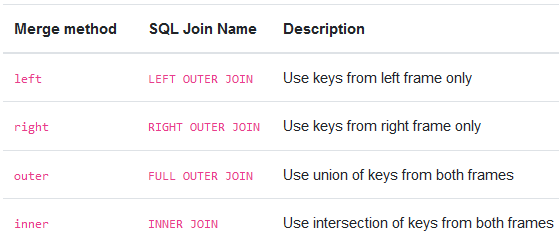

Die Merge-Methode wird an `merge` über den Parameter `how` übergeben.

In [ ]:
print('inner join: %s' % iris.merge(iris_info, on='species').shape[0]) # species-versicolor und species-lutescens fehlen
print('left join: %s' % iris.merge(iris_info, on='species', how='left').shape[0]) # species-lutescens fehlt
print('right join: %s' % iris.merge(iris_info, on='species', how='right').shape[0]) # species-versicolor fehlt
print('outer join: %s' % iris.merge(iris_info, on='species', how='outer').shape[0]) # alles da

inner join: 100
left join: 150
right join: 101
outer join: 151


## Reshape mit pivot, melt und tranpose
DataFrames können auf viele verschiedene Weise transformiert werden, um sie für Auswertungen und Analysen in eine geeignete Form zu bringen.

Die Daten im Iris-Datensatz sind einem sogenannten *wide format*. Es gibt mehrere Spalten (*wide*), die alle Längenmessungen enthalten. Mit Hilfe der Funktion `melt` ist es möglich die "Spalten in Zeilen" zu konvertieren. Die Spalte, die eine Zeile identifiziert und nicht in Zeilen konvertiert werden sollen, wird als `id_vars` übergeben.

In [ ]:
iris_long = iris.drop(columns=['species', 'sepal_length_category'])
iris_long['id'] = iris_long.index # die Zeilennumern "sichern", damit später wieder die passenden Werte zusammen kommen
iris_long = iris_long.melt(id_vars='id', var_name='key', value_name='measurement')
iris_long

,id,key,measurement
0,0,sepal_length,5.1
1,1,sepal_length,4.9
2,2,sepal_length,4.7
3,3,sepal_length,4.6
4,4,sepal_length,5.0
...,...,...,...
595,145,petal_width,2.3
596,146,petal_width,1.9
597,147,petal_width,2.0
598,148,petal_width,2.3


Aus den ursprünglich 150 Zeilen mit den vier Wert-Spalten wurden 600 Zeilen mit einer Wert-Spalte.

Dieses *long format* lässt sich mit Hilfe der Methode `pivot` wieder in das *wide format* transformieren.

In [ ]:
iris_long.pivot(index='id', columns='key', values='measurement')

key,petal_length,petal_width,sepal_length,sepal_width
id,,,,
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0


Für die Erstellung Diagrammen ist es manchmal hilfreich einen DataFrame zu transponieren (Zeilen und Spalten tauschen), bevor die Funktionen für das Diagramm aufgerufen werden. Dafür gibt es die Methode `transpose`.

In [ ]:
iris.drop(columns='sepal_length_category').groupby(['species']).mean().transpose()

species,species-setosa,species-versicolor,species-virginica
sepal_length,5.006,5.936,6.58804
sepal_width,3.418,2.770,2.97400
petal_length,1.464,4.260,5.55200
petal_width,0.244,1.326,2.02600


"Reshaping" ist wahrscheinlich das mächtigste, aber auch schwierigste Thema in Pandas. Mehr Details gibt es hier: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

## Visualisierung mit Pandas

Für die einfache und schnelle Erstellung Graphen wird in Pandas (und in Python allgemein) häufig auf die Matplotlib-Library zurückgegriffen. 

(https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Die einfachste Möglichkeit, in Pandas einen Plot zu generieren, ist die `plot` Funktion, die direkt auf einem DataFrame oder einer Series aufgerufen werden kann. Hier ein paar Beispiele:

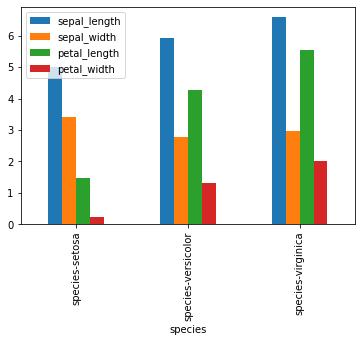

In [ ]:
# Das Balkendiagramm erzeugt für jede numerische Spalte einen unterschiedlich farbigen Balken.
# Die Kategorien (x-Achse) werden über die Zeilen gesteuert. In diesem Beispiel jeweils eine Zeile pro 'species' durch Gruppierung und Aggregation.
iris.groupby('species').mean().plot.bar()

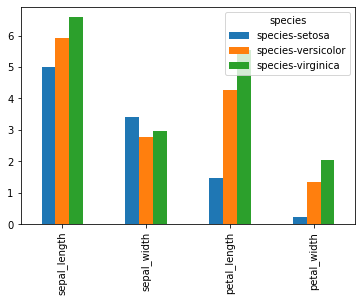

In [ ]:
# Mit 'transpose' Zeilen und Spalten vertauschen, um die Variablen je 'species' vergleichen zu können
iris.groupby('species').mean().transpose().plot.bar()

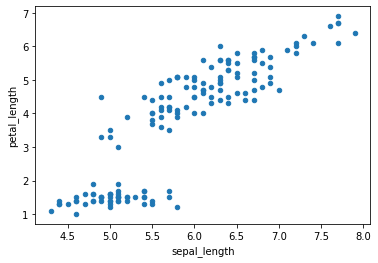

In [ ]:
# Ein Streudiagramm stellt den Zusammenhang von zwei Spalten dar 
iris.plot.scatter(x='sepal_length', y='petal_length')

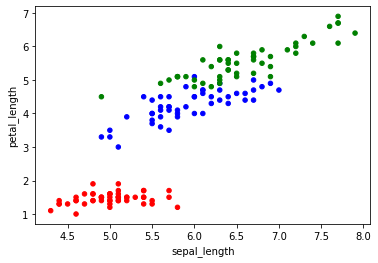

In [ ]:
# Das gleiche Streudiagramm, aber mit nach 'species' gefärbten Punkten über den Parameter 'c' der Funktion 'plot.scatter'
color_map = {'species-setosa':'red', 'species-versicolor':'blue', 'species-virginica':'green'}
colors = iris['species'].apply(lambda x : color_map[x])
iris.plot.scatter(x='sepal_length', y='petal_length', c=colors)

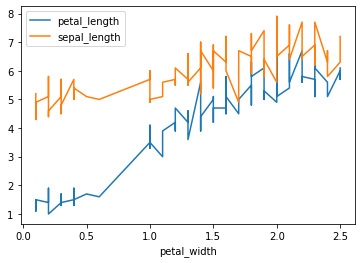

In [ ]:
# die Schwertlilien-Daten geben kein sehr gutes Liniendiagramm her, aber wir versuchen es trotzdem
iris.sort_values('petal_width').plot.line(x='petal_width', y=['petal_length', 'sepal_length'])

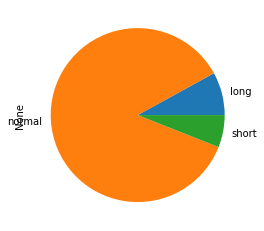

In [ ]:
# das gefürchtete Tortendiagramm
iris.groupby('sepal_length_category').size().plot.pie()

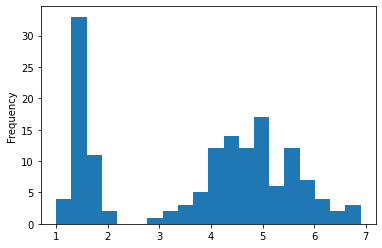

In [ ]:
# ein einfaches Histogramm
iris['petal_length'].plot.hist(bins=20)

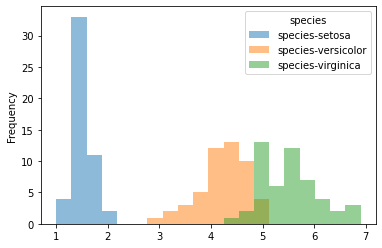

In [ ]:
# das Histogramm zeigt bei mehreren Spalten jede numerische Spalte mit einer eigenen Farbe an
# das können wir ausnutzen, um mittels Pivotierung ein Histogramm je 'species' angezeigt zu bekommen
iris.pivot(columns='species', values='petal_length').plot.hist(bins=20, alpha=0.5)

### Übung

Jetzt zu den Aufgaben für Dich:

1.   Kombiniere die Bestellungen mit den Lieferanten
2.   Erstelle eine Zusammenfassung die je Lieferanten-Typ und Liefertag den Gesamtumsatz angibt.
3.   Pivotiere diese Zusammenfassung so, dass der Gesamtumsatz je Lieferanten-Typ in einer eigenen Spalte steht
4.   Erstelle ein Liniendiagramm mit x-Achse=Liefertag, y-Achse=Gesamtumsatz und zwei Linien je Lieferanten-Typ
5.   Wie viel Umsatz wäre durchschnittlich pro Monat verloren gegangen, wenn alle Lieferanten mit einem Auslieferungsumkreis von genau 15 km diesen auf 10 km reduziert hätten?


In [ ]:
# Platz für Deine Übungen :)

### Lösungen

In [ ]:
# 1. Kombiniere die Bestellungen mit den Lieferanten
df = orders.merge(vendors, on='vendor_id')
df.head()

,customer_id,grand_total,vendor_rating_x,driver_rating,delivery_distance,order_accepted_time,delivered_time,delivery_date,vendor_id,location_number,delivered_weekday_name,latitude,longitude,vendor_category_en,serving_distance,vendor_rating_y,vendor_tag_name,opens_at,closes_at
0,92PEE24,7.6,NaN,0.0,0.0,NaT,NaT,2019-07-31,105,0,NaN,-0.967769,0.080839,Restaurants,15.0,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",10:59AM,11:30PM
1,I9DNSMJ,14.4,NaN,0.0,0.0,NaT,NaT,2019-07-31,105,0,NaN,-0.967769,0.080839,Restaurants,15.0,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",10:59AM,11:30PM
2,I9DNSMJ,14.4,NaN,0.0,0.0,NaT,NaT,2019-07-31,105,0,NaN,-0.967769,0.080839,Restaurants,15.0,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",10:59AM,11:30PM
3,4BQI76G,8.7,NaN,0.0,0.0,NaT,NaT,2019-08-01,105,0,NaN,-0.967769,0.080839,Restaurants,15.0,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",10:59AM,11:30PM
4,V6JC4VF,20.4,NaN,0.0,0.0,NaT,NaT,2019-08-01,105,0,NaN,-0.967769,0.080839,Restaurants,15.0,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",10:59AM,11:30PM


In [ ]:
# 2. Erstelle eine Zusammenfassung die je Lieferanten-Typ und Liefertag den Gesamtumsatz angibt.
df = df.groupby(['delivery_date', 'vendor_category_en'])['grand_total'].sum().reset_index()
df.head()

,delivery_date,vendor_category_en,grand_total
0,2019-05-31,Restaurants,565.3
1,2019-05-31,Sweets & Bakes,268.3
2,2019-06-01,Restaurants,3138.1
3,2019-06-01,Sweets & Bakes,765.2
4,2019-06-02,Restaurants,2609.0


In [ ]:
# 3. Pivotiere diese Zusammenfassung, so dass der Gesamtumsatz je Lieferanten-Typ in einer eigenen Spalte steht
df = df.pivot(index='delivery_date', columns='vendor_category_en', values='grand_total').reset_index()
df.head()

vendor_category_en,delivery_date,Restaurants,Sweets & Bakes
0,2019-05-31,565.3,268.3
1,2019-06-01,3138.1,765.2
2,2019-06-02,2609.0,559.1
3,2019-06-03,2846.9,201.2
4,2019-06-04,3599.2,609.2


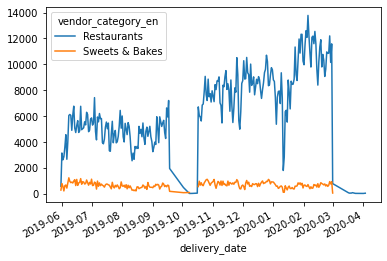

In [ ]:
# 4. Erstelle ein Liniendiagramm mit x-Achse=Liefertag, y-Achse=Gesamtumsatz und zwei Linien je Lieferanten-Typ
df.plot.line(x='delivery_date')

## Weiterführende Ressourcen
Themen zur Vertiefung der Konzepte und Methoden in diesem Notebook:

*   **Fehlende Daten** In Pandas werden fehlende Daten normalerweise mit dem Numpy-Wert `np.nan` (aus der Bibliothek NumPy) dargestellt. In der Praxis können allerdings auch andere Wert auftreten, z.b. der Python-Wert `None`. Als Entsprechung für den datetime-Datentyp stellt Pandas zusätzlich `pd.nat` (Not A Time) zur Verfügung. Der Umgang mit fehlenden Daten ist operationsabhängig, z.B. können sie komplett ignoriert oder als "0" behandelt werden. (https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)
*   **Cookbook** (enthält sehr viele Kurzbeispiele): https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html

* **Vergleich zwischen Pandas und SQL**: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

*   **Pandas-Cheatsheet** (übersichtliche Zusammenfassung): https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

*   **URL-Cache löschen** hilft, falls sich eine über HTTP geladene Ressource geändert hat, aber Pandas immer noch die alten Daten lädt: 
```
import urllib.request
urllib.request.urlcleanup()
```




